In [1]:
from keras.src.ops import normalize
from scipy.io import arff
from operator import index

import numpy as np
from sklearn.neighbors import NearestNeighbors, KernelDensity
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import scipy.stats
import seaborn as sns
import math
from scipy import integrate
from statsmodels.sandbox.panel.sandwich_covariance_generic import kernel

plt.rcParams['figure.figsize'] = [15, 7]


In [2]:
arff_file = arff.loadarff('./clusters/artificial/cluto-t4-8k.arff')
df = pd.DataFrame(arff_file[0])

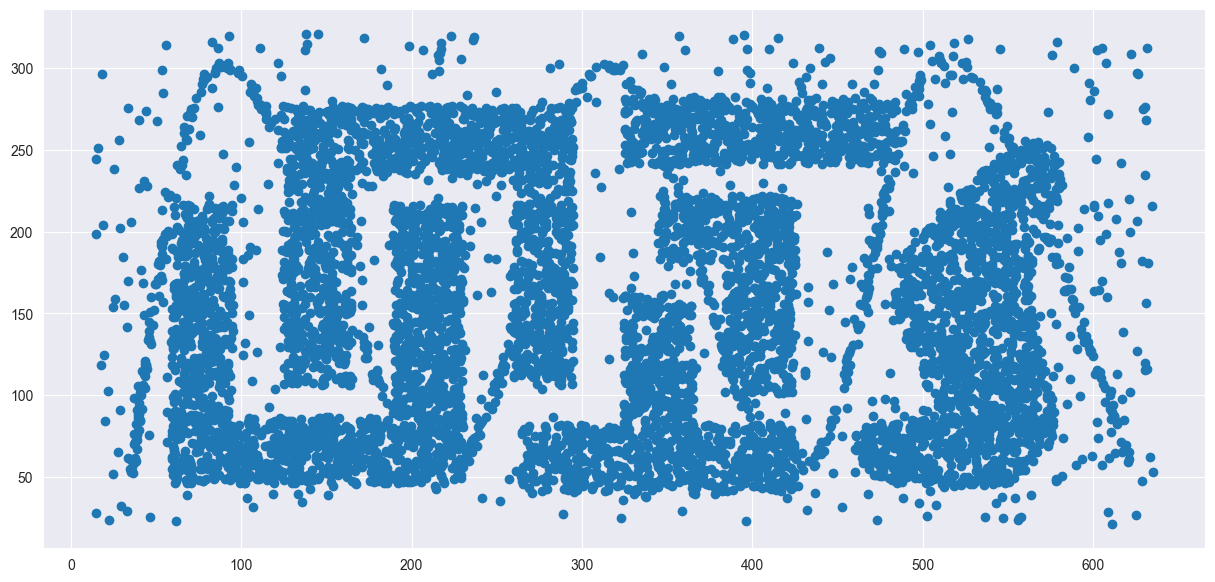

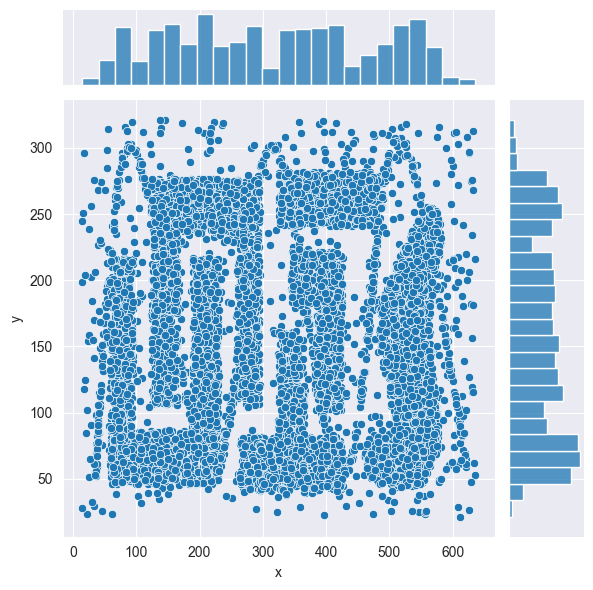

In [3]:
plt.scatter(df['x'],df['y'])
sns.jointplot(x=df['x'],y=df['y'],data=df)
plt.show()

In [49]:
X = df.iloc[:,:2].values
y = df.iloc[:,2].values
le = LabelEncoder()
y = le.fit_transform(y)
def main(X,y,n):
    nn = NearestNeighbors(n_neighbors=n)
    nn.fit(X, y)
    dist, knn = nn.kneighbors(X)  # returns N index neighbors including self
    return knn, dist

knn, distReturn = main(X,y,30)

In [50]:
def generateArr(newDist, median='median'):
    arr = []
    for x in newDist:  # finds the distance away from that point (index 0)
        if median == 'median':
            arr += [np.median(x)]
        elif median == 'sum': # min + median + max
            arr += [x[1]+np.max(x)+np.median(x)]
        elif median == 'max':
            arr += [np.max(x)]
        elif median == 'minMax':
            arr += [np.max(x)+x[1]]
        elif median == 'medMax':
            arr += [np.median(x)+np.max(x)]
        elif median == 'min':
            arr += [x[1]]
            

    return arr

distReturn = np.array(distReturn)
arr = generateArr(distReturn, median="max")

1.6904930577361283
[[100.904999 205.776993]
 [504.035004 314.125   ]
 [537.507019 279.666992]
 ...
 [ 31.216999 155.220993]
 [442.42099  303.721985]
 [495.451996 288.502991]]


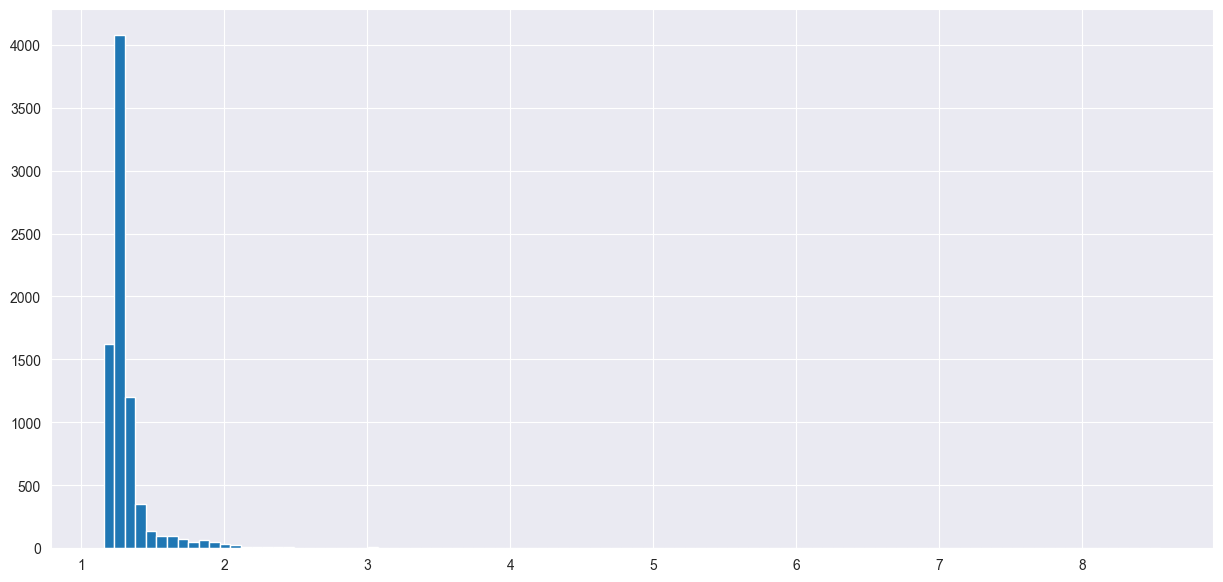

In [60]:
# exponential f(x) = lambda * e^(-lambda*x)
pdfExp = np.array([])
arr = (arr-np.min(arr))/(np.max(arr)-np.min(arr))
x2 = np.linspace(min(arr) - 2, max(arr) + 2, 100)

for z in arr:
    total = 0
    for s in range(len(x2)):
        u = (s-z) / .5
        total += 1*math.exp(-(1*u))
    pdfExp = np.append(pdfExp,total)

maxer = np.max(pdfExp)*.3
print(np.percentile(pdfExp, 95))
outs = pdfExp > np.percentile(pdfExp, 92)
print(X[outs])
totalOuts = y[outs]
plt.hist(pdfExp,bins=100)
plt.show()

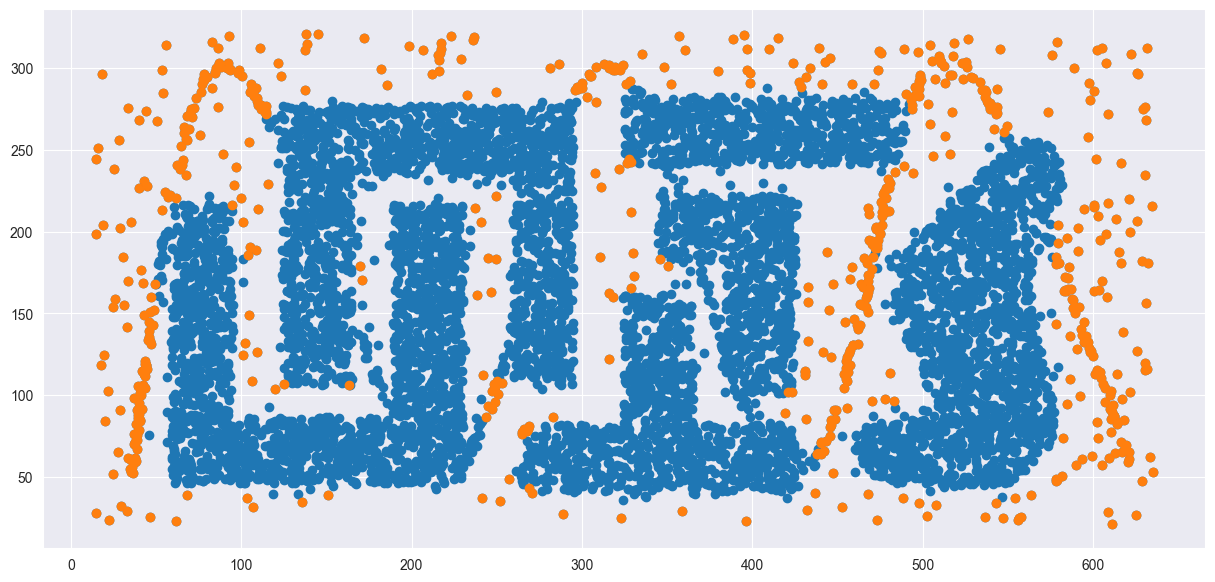

In [61]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(X[outs,0],X[outs,1])
plt.show()

In [62]:
countOuts = 0
for s in totalOuts:
    if s == 6:
        countOuts += 1

print(countOuts,len(totalOuts))

613 640
